In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv('Linear Regression - Sheet1.csv')
data.sample(5)

,X,Y
121,122,84.555556
74,75,53.222222
299,300,1.888889
217,218,148.555556
49,50,36.555556


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
X,300.0,150.500000,86.746758,1.000000,75.750000,150.500000,225.250000,300.000000
Y,300.0,102.215556,57.842711,1.888889,52.388889,102.222222,152.055556,201.888889


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       300 non-null    int64  
 1   Y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


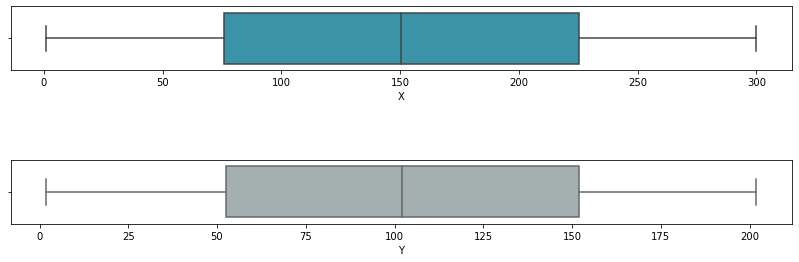

In [7]:
plt.figure(figsize=(14,4))
plt.subplot(3,1,1)
sns.boxplot(x=data.X, color='#299FB9')
plt.subplot(3,1,3)
sns.boxplot(x=data.Y, color='#A1B2B1');

In [10]:
X=data.iloc[:,:-1].values
y=data.iloc[:,:-1].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)
print((X_train.shape,X_test.shape,y_train.shape,y_test.shape))
type(X_train)

((285, 1), (15, 1), (285, 1), (15, 1))


numpy.ndarray

In [12]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
y_test = pd.DataFrame(y_test)
print((X_train.shape,X_test.shape,y_train.shape,y_test.shape))
type(X_train),type(y_train)

((285, 1), (15, 1), (285, 1), (15, 1))


(numpy.ndarray, numpy.ndarray)

In [13]:
(m,n) = X_train.shape

In [14]:
theta=np.zeros((n,1))

In [15]:
def cost(X_train,y_train,theta) :
    J=0
    h= X_train@theta 
    sqrErrors = (h - y_train)**2
    J = 1/(2*m) * sqrErrors.sum()
    return  J  
    
J=cost(X_train,y_train,theta)
J

14995.147368421052

In [16]:
num_iters = 20
alpha=0.00001

#descent gradient function
def DescentGradient(X_train,y_train,theta,num_iters,alpha):
     
    cost_history = []
#   store theta value into list
    past_thetas = [theta]
    for i in range(num_iters):
        h= X_train@theta
        delta = (X_train.transpose()@(h - y_train))/m
        theta= theta- alpha*delta
        cost_i= cost(X_train,y_train,theta)
        cost_history.append(cost_i)
        past_thetas.append(theta)
        

    return past_thetas,cost_history

past_thetas,cost_history = DescentGradient(X_train,y_train,theta,num_iters,alpha)
theta = past_thetas[-1]

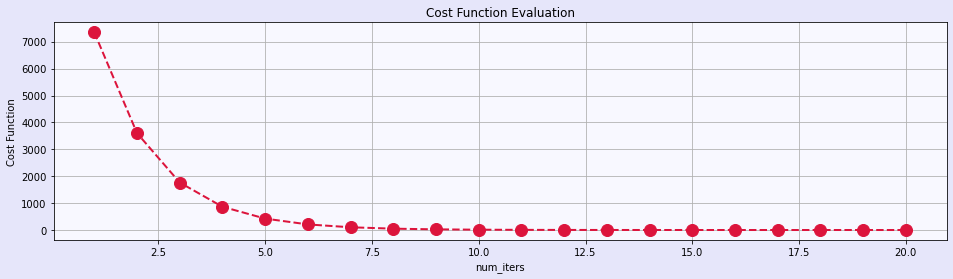

In [17]:
x = np.arange(1,len(cost_history)+1) #iterations
plt.figure(figsize=(16, 4),facecolor='lavender')
plt.axes().set_facecolor('ghostwhite')
plt.plot(x,cost_history, 'go--', linewidth=2, markersize=12, color = "crimson")
plt.grid()
plt.xlabel("num_iters")
plt.ylabel("Cost Function")
plt.title('Cost Function Evaluation')
plt.show()

In [18]:
lr_pred =X_test@theta

In [19]:
r2_lr = r2_score(y_test, lr_pred)*100
mae_lr = mean_absolute_error(y_test, lr_pred)
mse_lr = mean_squared_error(y_test, lr_pred)
print([r2_lr, mae_lr, mse_lr])

[99.99973895498199, 0.12663520028574737, 0.02124748659284519]


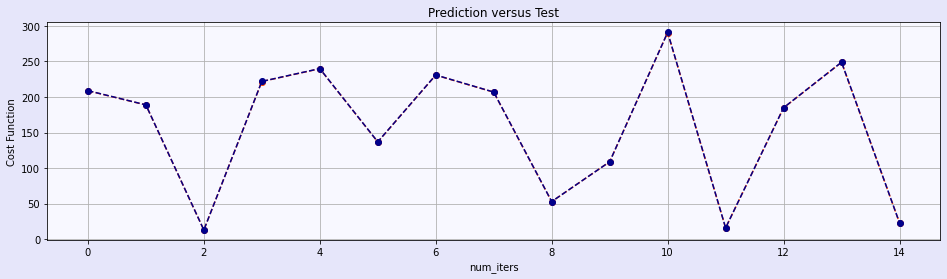

In [21]:
plt.figure(figsize=(16, 4),facecolor='lavender')
plt.axes().set_facecolor('ghostwhite')
plt.grid()
plt.plot(lr_pred,'bo--',color ="orangered"),
plt.plot(y_test,'bo--',color ="darkblue")
plt.xlabel("num_iters")
plt.ylabel("Cost Function")
plt.title('Prediction versus Test')
plt.show()

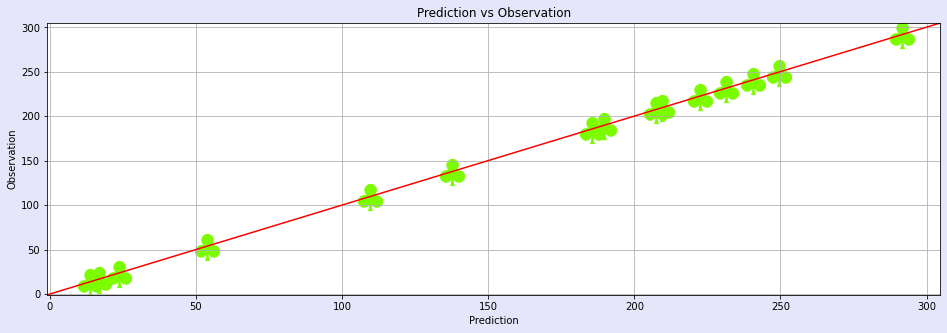

In [22]:
fig,ax = plt.subplots(figsize=(16, 5))

ax.plot([0,1],[0,1], transform=ax.transAxes, color = "red")
plt.scatter(lr_pred, y_test, s=800, alpha=1,marker=r'$\clubsuit$',label="Luck",facecolor='lawngreen')
fig.set_facecolor("lavender")
plt.grid()
plt.xlabel("Prediction")
plt.ylabel("Observation")
plt.title('Prediction vs Observation')

plt.show()